## Setup Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Projet IA - Exploratory Data Analysis and Dataset Cleaning

Analyse d'une dataset de jeux d'échecs : https://www.kaggle.com/datasets/datasnaek/chess/data

### Columns of the dataset
- `id`
- `rated` (Rated TRUE/FALSE)
- `created_at` (Start Time)
- `last_move_at` (End Time)
- `turns`
- `victory_status`
- `winner`
- `increment_code` (Time Increment)
- `white_id`
- `white_rating`
- `black_id`
- `black_rating`
- `moves` (All Moves in Standard Chess Notation)
- `opening_eco` (Standardised Code for any given opening)
- `opening_name`
- `opening_ply` (Number of moves in the opening phase)


### Introduction - Loading the dataset

In [ ]:
FILE_PATH = 'games.csv'

In [ ]:
#import dataset
dataset = pd.read_csv(FILE_PATH)

#print dataset shape
print(dataset.shape)

#display the first 5 rows of the dataset
print(dataset.head())

(20058, 16)
         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               mov

In [ ]:
#Display count for match that are rated false (friendly match)
dataset['rated'].value_counts()
dataset = dataset[dataset['rated'] == True]

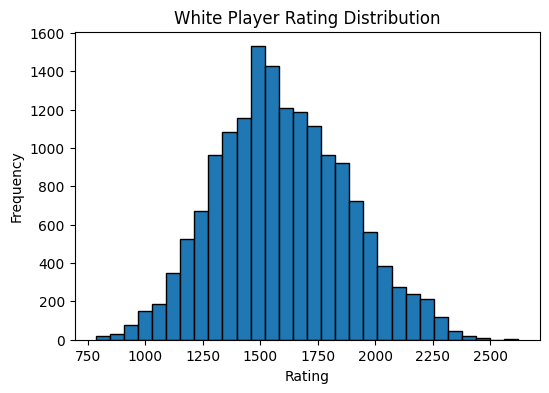

In [ ]:
#plot white player's rating
plt.figure(figsize=(6, 4))
plt.hist(dataset['white_rating'], bins=30, edgecolor='black')
plt.title('White Player Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

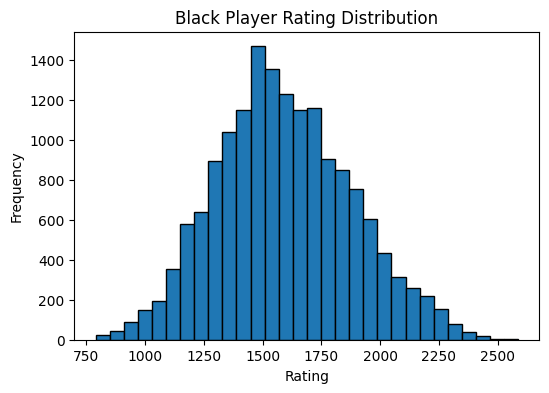

In [ ]:
#plot black player's rating
plt.figure(figsize=(6, 4))
plt.hist(dataset['black_rating'], bins=30, edgecolor='black')
plt.title('Black Player Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Correlation Matrix

The correlation matrix is a table that shows the correlation coefficients between pairs of variables in a dataset. We can use it to establish how different variables are possibly related to each other

In [ ]:
def display_correlation_matrix(
    df: pd.DataFrame,
    figsize: Tuple[int, int] = (12, 10),
    cmap: str = 'coolwarm',
    annot: bool = True,
    fmt: str = '.2f',
    mask_upper: bool = False,
    title: str = 'Correlation Matrix',
    vmin: float = -1.0,
    vmax: float = 1.0
) -> None:
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    if numeric_df.empty:
        print("No numeric columns found in the DataFrame.")
        return

    # Calculate correlation matrix
    corr_matrix = numeric_df.corr()

    # Create mask for upper triangle if requested
    mask = None
    if mask_upper:
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Create the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=annot,
        fmt=fmt,
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )
    plt.title(title, fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

    return corr_matrix

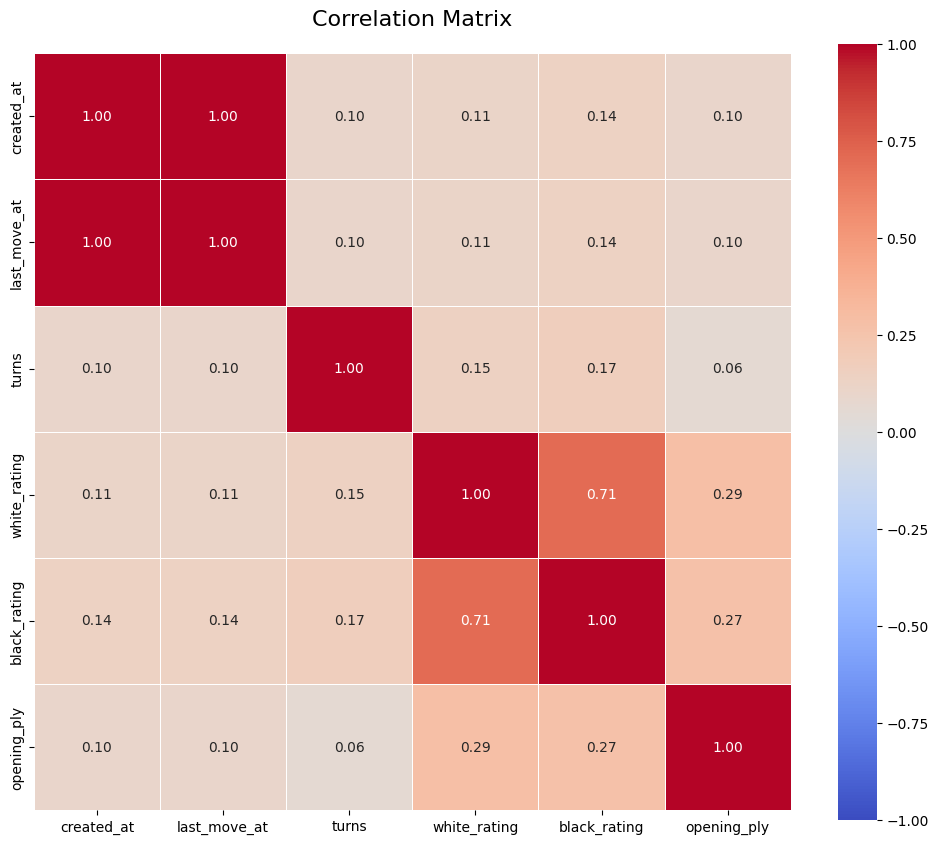

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
created_at,1.000000,1.000000,0.097148,0.112185,0.138843,0.100572
last_move_at,1.000000,1.000000,0.097159,0.112187,0.138846,0.100574
turns,0.097148,0.097159,1.000000,0.147811,0.170288,0.055174
white_rating,0.112185,0.112187,0.147811,1.000000,0.709764,0.285029
black_rating,0.138843,0.138846,0.170288,0.709764,1.000000,0.271603
opening_ply,0.100572,0.100574,0.055174,0.285029,0.271603,1.000000


In [ ]:
display_correlation_matrix(dataset, figsize=(10, 10))

### Scatter plot: match result, white rating vs black rating

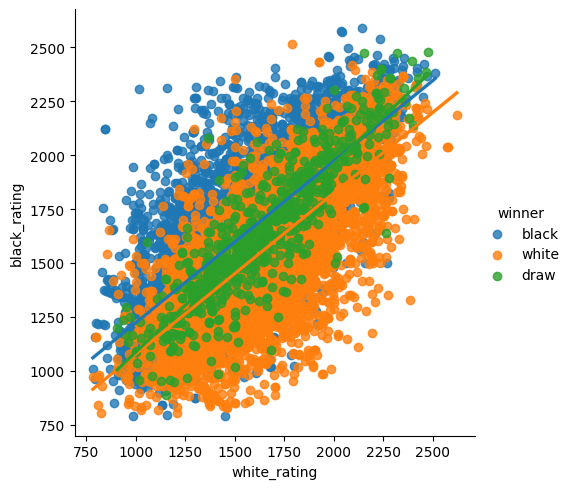

In [ ]:
# Scatter plot: White rating vs Black rating, colored by result

sns.lmplot(x="white_rating", y="black_rating", hue="winner", data=dataset)

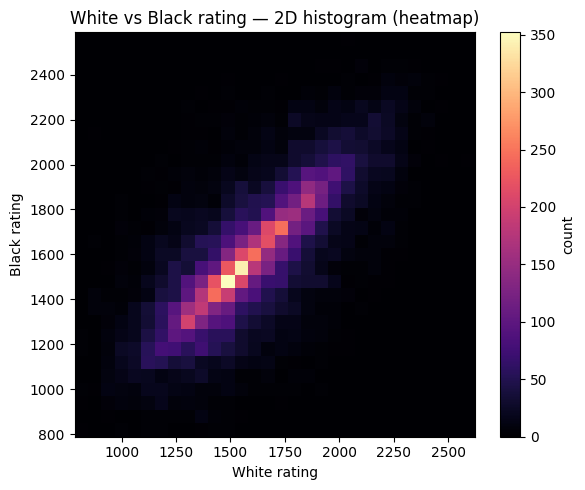

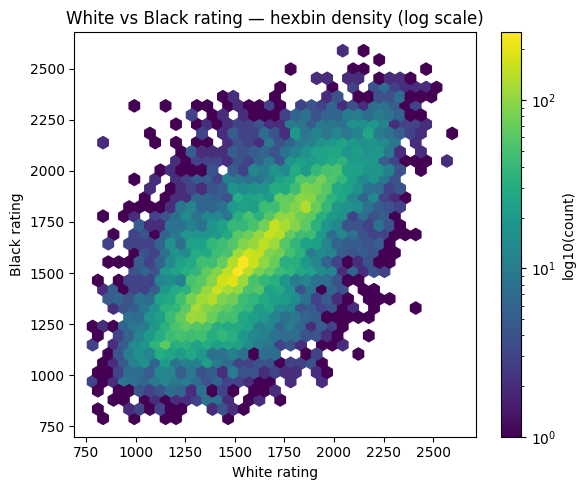

In [ ]:
x = dataset['white_rating']
y = dataset['black_rating']

# 2D histogram heatmap
plt.figure(figsize=(6, 5))
plt.hist2d(x, y, bins=[30, 30], cmap='magma')
plt.colorbar(label='count')
plt.xlabel('White rating')
plt.ylabel('Black rating')
plt.title('White vs Black rating — 2D histogram (heatmap)')
plt.tight_layout()
plt.show()

# Hexbin (log-scaled) density
plt.figure(figsize=(6, 5))
plt.hexbin(x, y, gridsize=35, cmap='viridis', bins='log')
cb = plt.colorbar()
cb.set_label('log10(count)')
plt.xlabel('White rating')
plt.ylabel('Black rating')
plt.title('White vs Black rating — hexbin density (log scale)')
plt.tight_layout()
plt.show()


### Winrate for white with ELO difference

/tmp/ipython-input-3778867363.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_by_bin = dataset.groupby(elo_diff_binned)['winner'].apply(lambda x: (x == 'white').mean() * 100)


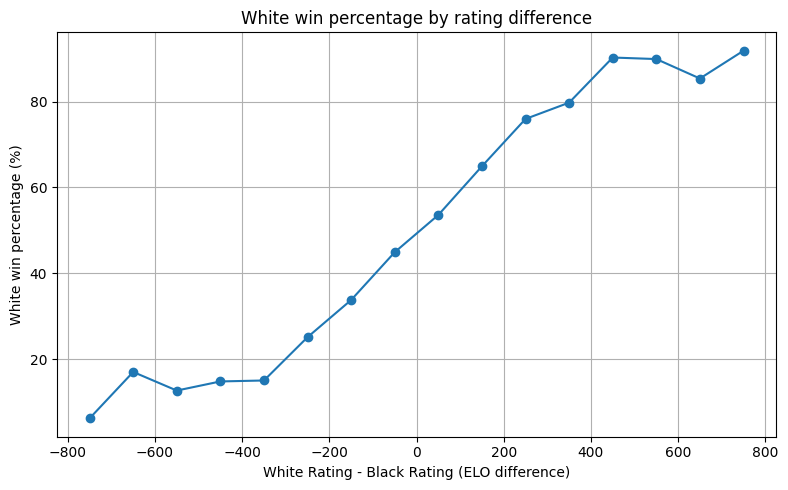

In [ ]:
# Calculate ELO difference
elo_diff = dataset['white_rating'] - dataset['black_rating']

# Bin the ELO differences
elo_bins = np.arange(-800, 801, 100)
elo_diff_binned = pd.cut(elo_diff, bins=elo_bins)

# Calculate win percentage by bin (winner == 'white')
win_by_bin = dataset.groupby(elo_diff_binned)['winner'].apply(lambda x: (x == 'white').mean() * 100)

# Plotting
plt.figure(figsize=(8,5))
bin_centers = [interval.mid for interval in win_by_bin.index]
plt.plot(bin_centers, win_by_bin.values, marker='o')
plt.xlabel('White Rating - Black Rating (ELO difference)')
plt.ylabel('White win percentage (%)')
plt.title('White win percentage by rating difference')
plt.grid(True)
plt.tight_layout()
plt.show()



### Winrate depending on white first move

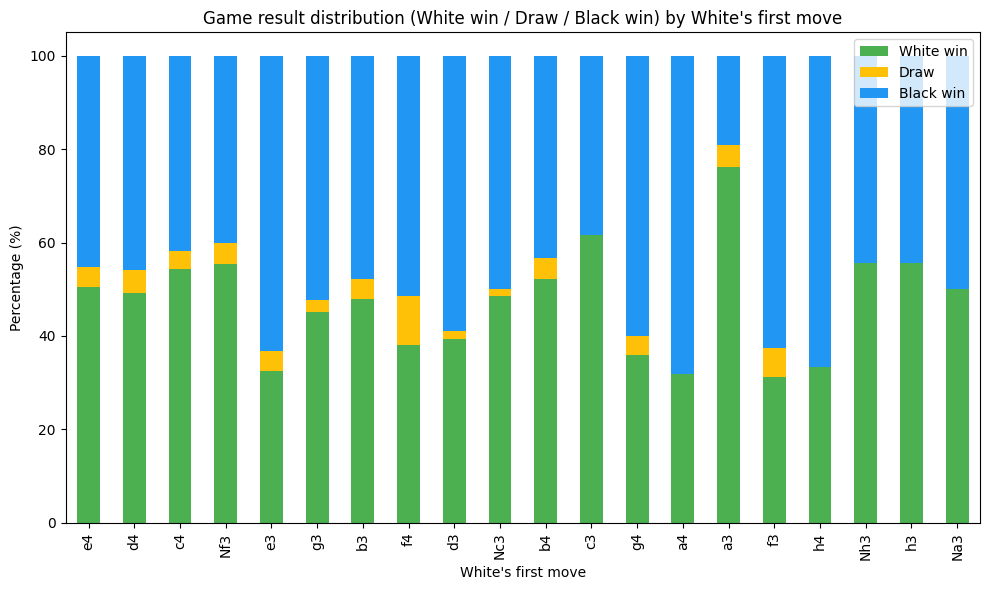

In [ ]:
# "First move" here is the first move in the moves string
first_moves = dataset['moves'].apply(lambda m: m.split()[0] if isinstance(m, str) and len(m.split()) > 0 else None)
win_counts = pd.crosstab(first_moves, dataset['winner'])

# Ensure all possible outcome columns are present and ordered
for winner in ['white', 'draw', 'black']:
    if winner not in win_counts.columns:
        win_counts[winner] = 0
win_counts = win_counts[['white', 'draw', 'black']]

win_perc = win_counts.div(win_counts.sum(axis=1), axis=0) * 100

top_moves = win_counts.sum(axis=1).sort_values(ascending=False).index
plot_data = win_perc.loc[top_moves]

# Plot the result distribution
plot_data.plot(kind='bar', stacked=True, figsize=(10,6), color=['#4CAF50', '#FFC107', '#2196F3'])
plt.xlabel("White's first move")
plt.ylabel("Percentage (%)")
plt.title("Game result distribution (White win / Draw / Black win) by White's first move")
plt.legend(['White win', 'Draw', 'Black win'])
plt.tight_layout()
plt.show()


### Top 5 ouverture by elo rating bin

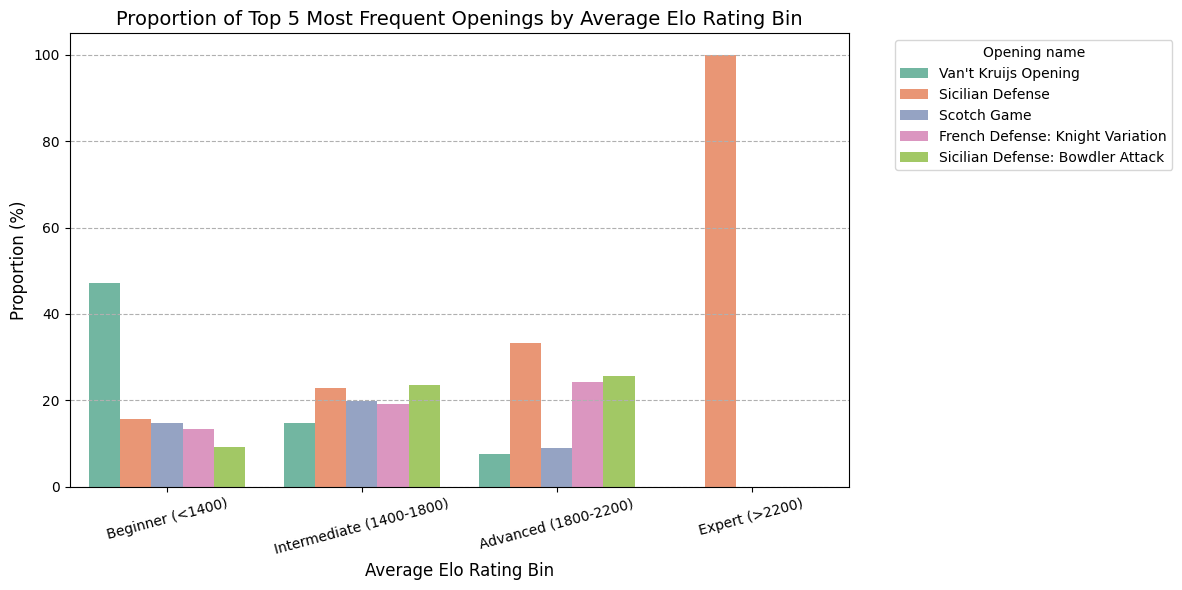

In [ ]:
# Reload/filter the DataFrame to ensure variables exist and are updated
# We can use the 'dataset' DataFrame directly as it was already filtered for rated games and duplicates
df_rated = dataset.copy()

# 1. Calculate the mean Elo rating and define the rating bins
df_rated['mean_rating'] = (df_rated['white_rating'] + df_rated['black_rating']) / 2
bins = [1000, 1400, 1800, 2200, df_rated['mean_rating'].max() + 1]
labels = ['Beginner (<1400)', 'Intermediate (1400-1800)', 'Advanced (1800-2200)', 'Expert (>2200)']
df_rated['elo_group'] = pd.cut(df_rated['mean_rating'], bins=bins, labels=labels, right=False)

# 2. Select the 5 most common openings using 'opening_eco'
top_openings_eco = df_rated['opening_name'].value_counts().nlargest(5).index
df_plot = df_rated[df_rated['opening_name'].isin(top_openings_eco)].copy()

# 3. Calculate proportions by Elo bin
# Use 'observed=True' to correctly handle categories
opening_proportions = df_plot.groupby('elo_group', observed=True)['opening_name'].value_counts(normalize=True).mul(100).rename('proportion').reset_index()

# 4. Create the grouped bar chart
plt.figure(figsize=(12, 6))
bar_chart = sns.barplot(
    x='elo_group',
    y='proportion',
    hue='opening_name', # Use opening_eco for hue
    data=opening_proportions,
    palette='Set2'
)

plt.title('Proportion of Top 5 Most Frequent Openings by Average Elo Rating Bin', fontsize=14)
plt.xlabel('Average Elo Rating Bin', fontsize=12)
plt.ylabel('Proportion (%)', fontsize=12)
plt.legend(title='Opening name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

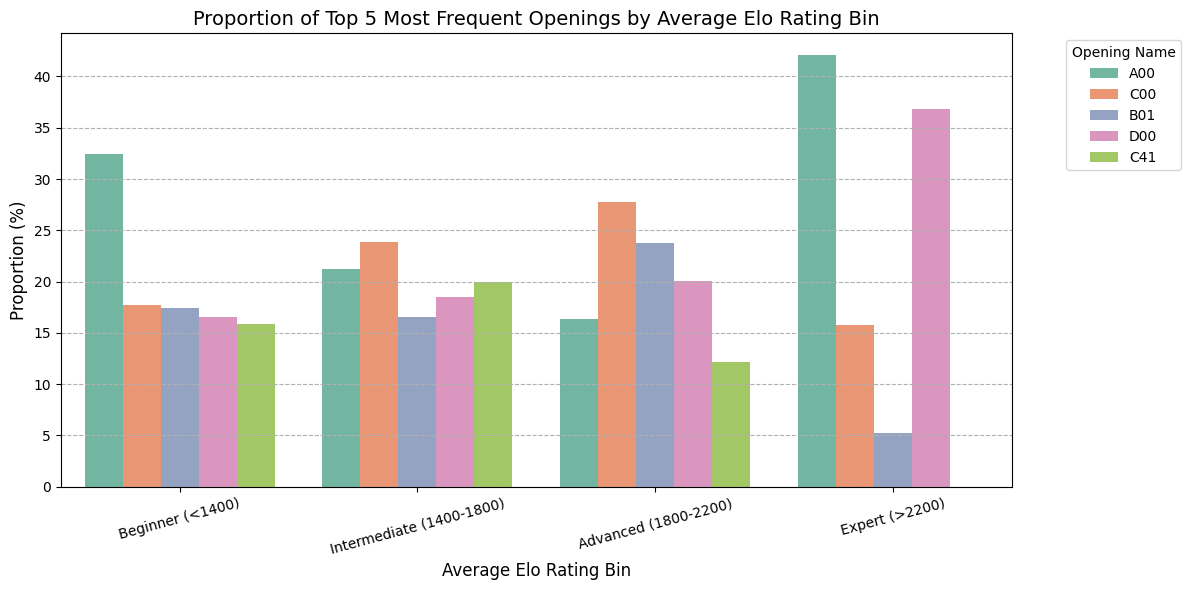

In [ ]:
# Reload/filter the DataFrame to ensure variables exist and are updated
# We can use the 'dataset' DataFrame directly as it was already filtered for rated games and duplicates
df_rated = dataset.copy()

# 1. Calculate the mean Elo rating and define the rating bins
df_rated['mean_rating'] = (df_rated['white_rating'] + df_rated['black_rating']) / 2
bins = [1000, 1400, 1800, 2200, df_rated['mean_rating'].max() + 1]
labels = ['Beginner (<1400)', 'Intermediate (1400-1800)', 'Advanced (1800-2200)', 'Expert (>2200)']
df_rated['elo_group'] = pd.cut(df_rated['mean_rating'], bins=bins, labels=labels, right=False)

# 2. Select the 5 most common openings using 'opening_eco'
top_openings_eco = df_rated['opening_eco'].value_counts().nlargest(5).index
df_plot = df_rated[df_rated['opening_eco'].isin(top_openings_eco)].copy()

# 3. Calculate proportions by Elo bin
# Use 'observed=True' to correctly handle categories
opening_proportions = df_plot.groupby('elo_group', observed=True)['opening_eco'].value_counts(normalize=True).mul(100).rename('proportion').reset_index()

# 4. Create the grouped bar chart
plt.figure(figsize=(12, 6))
bar_chart = sns.barplot(
    x='elo_group',
    y='proportion',
    hue='opening_eco', # Use opening_eco for hue
    data=opening_proportions,
    palette='Set2'
)

plt.title('Proportion of Top 5 Most Frequent Openings by Average Elo Rating Bin', fontsize=14)
plt.xlabel('Average Elo Rating Bin', fontsize=12)
plt.ylabel('Proportion (%)', fontsize=12)
plt.legend(title='Opening Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Winrate by top 10 ouverture

--- Proportion of winner by top 10 ouverture ---
winner                                         black  draw  white
opening_name                                                     
Scandinavian Defense: Mieses-Kotroc Variation  35.27  2.42  62.32
Horwitz Defense                                45.11  2.72  52.17
Scotch Game                                    45.21  3.65  51.14
French Defense: Knight Variation               43.67  5.68  50.66
Queen's Pawn Game: Mason Attack                45.99  4.81  49.20
Queen's Pawn Game: Chigorin Variation          50.56  2.78  46.67
Sicilian Defense                               53.00  2.83  44.17
Scandinavian Defense                           51.61  5.38  43.01
Sicilian Defense: Bowdler Attack               56.05  4.84  39.11
Van't Kruijs Opening                           64.29  4.22  31.49


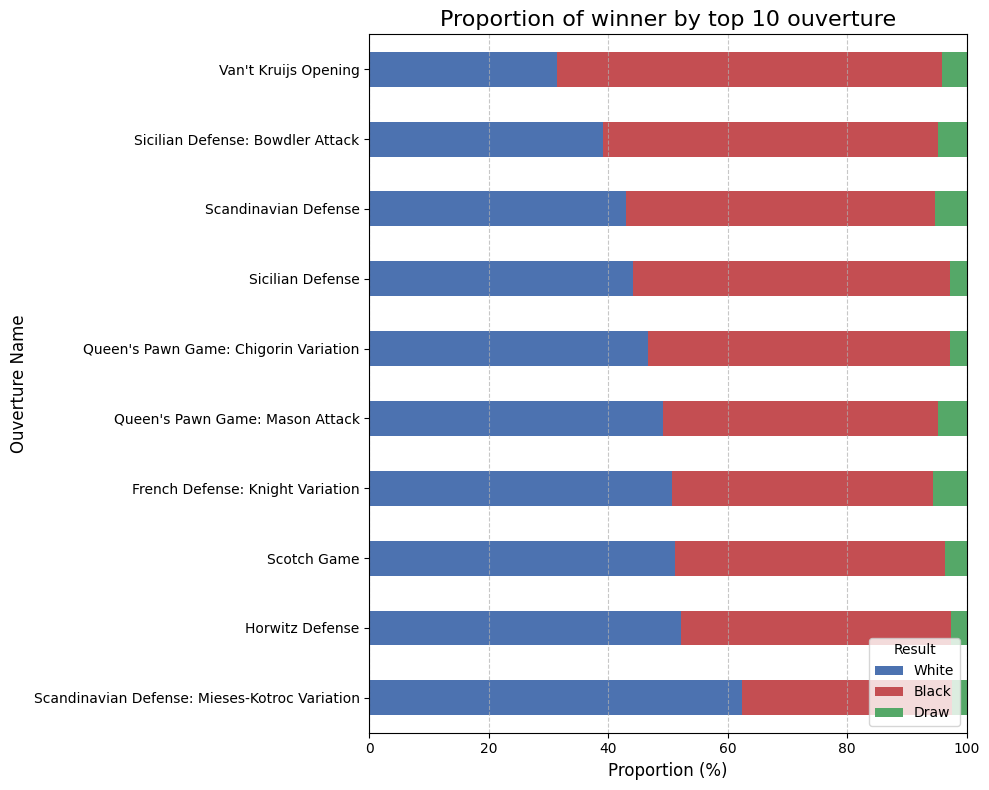

In [ ]:
df_rated = dataset[dataset['rated'] == True].copy()

# 1. Sélection des 10 ouvertures les plus fréquentes
top_10_openings = df_rated['opening_name'].value_counts().nlargest(10).index # Use opening_eco
df_openings = df_rated[df_rated['opening_name'].isin(top_10_openings)] # Use opening_eco

# 2. Calcul des proportions de chaque résultat (winner) pour chaque ouverture
winner_proportions = pd.crosstab(
    df_openings['opening_name'], # Use opening_eco
    df_openings['winner'],
    normalize='index'
).mul(100).sort_values(by='white', ascending=False)

# Affichage du tableau (pour référence)
print("--- Proportion of winner by top 10 ouverture ---") # Update title
print(winner_proportions.round(2))

# 3. Visualisation : Graphique à Barres Horizontal Empilé
plt.figure(figsize=(10, 8)) # Adjust figure size for horizontal bars

winner_proportions[['white', 'black', 'draw']].plot(
    kind='barh', # Change to horizontal bar chart
    stacked=True,
    figsize=(10, 8), # Adjust figure size again
    color=['#4C72B0', '#C44E52', '#55A868'],
    ax=plt.gca()
)

plt.title('Proportion of winner by top 10 ouverture', fontsize=16) # Update title
plt.xlabel('Proportion (%)', fontsize=12) # Swap labels
plt.ylabel('Ouverture Name', fontsize=12) # Swap labels
plt.legend(title='Result', labels=['White', 'Black', 'Draw'], loc='lower right') # Adjust legend location
plt.xlim(0, 100) # Set x-axis limit
plt.grid(axis='x', linestyle='--', alpha=0.7) # Change grid axis
plt.tight_layout()
plt.show()

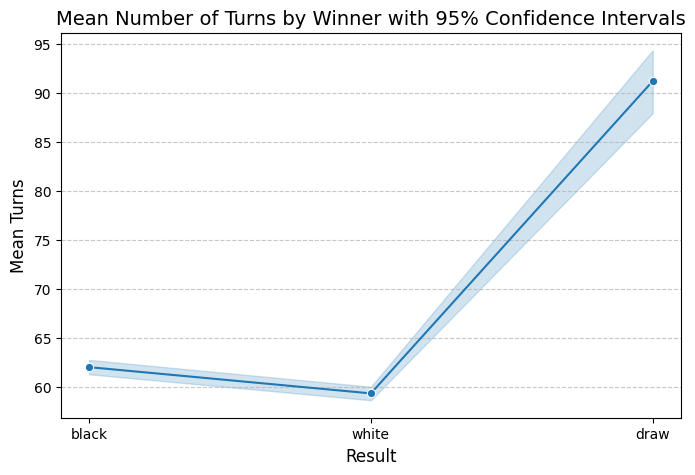

In [ ]:
df_rated = dataset[dataset['rated'] == True].copy()

# Calculate the mean number of turns for each winner
plt.figure(figsize=(8, 5))

sns.lineplot(
    data=df_rated, # Use the full dataframe
    x='winner',
    y='turns',
    marker='o', # Add markers for better visibility
    errorbar=('ci', 95), # Add confidence intervals
    estimator='mean' # Use the mean as the estimator
)

plt.title('Mean Number of Turns by Winner with 95% Confidence Intervals', fontsize=14)
plt.xlabel('Result', fontsize=12)
plt.ylabel('Mean Turns', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Winrate by endgame status

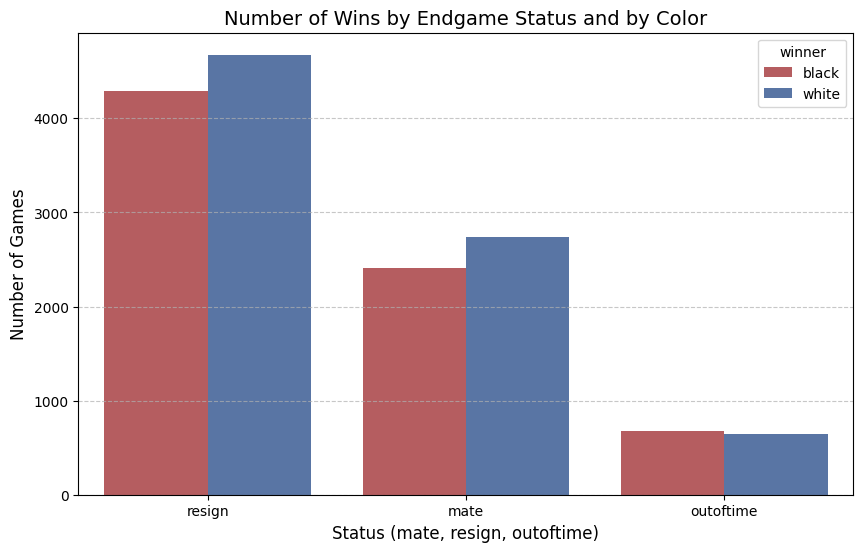

In [ ]:
df_rated = dataset[dataset['rated'] == True].copy()

# filter draws to avoid "non end matches"
df_wins = df_rated[df_rated['winner'] != 'draw'].copy()

plt.figure(figsize=(10, 6))

sns.countplot(
    data=df_wins,
    x='victory_status',
    hue='winner',
    palette={'white': '#4C72B0', 'black': '#C44E52'},
    order=df_wins['victory_status'].value_counts().index
)

plt.title('Number of Wins by Endgame Status and by Color', fontsize=14)
plt.xlabel('Status (mate, resign, outoftime)', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Display all games in the dataset that started with 'a3'
a3_games = dataset[dataset['moves'].apply(lambda m: isinstance(m, str) and m.split()[0] == 'a3')]
print(a3_games)



             id  rated    created_at  last_move_at  turns victory_status  \
1528   elfEa1pg   True  1.496350e+12  1.496350e+12    117           draw   
3259   mFbRQBEx   True  1.487850e+12  1.487850e+12     28           mate   
5301   nHSnrCha   True  1.487140e+12  1.487140e+12     35           mate   
5302   yzJrB5Ws   True  1.487140e+12  1.487140e+12     63           mate   
5303   OhQSh8yv   True  1.486870e+12  1.486870e+12     20         resign   
5306   8K4BUCPt   True  1.482560e+12  1.482560e+12     70           mate   
6310   vvcxPJA2   True  1.500550e+12  1.500550e+12     78           mate   
6987   fodNBvuE   True  1.451240e+12  1.451240e+12     51           mate   
6990   80gj0Kgz   True  1.451150e+12  1.451160e+12     61         resign   
7694   tncVfLIz   True  1.500240e+12  1.500240e+12     36         resign   
10641  QdhBOeal   True  1.393958e+12  1.393958e+12      2         resign   
13910  kTFcPqCS   True  1.503349e+12  1.503349e+12     47         resign   
15144  i5ILj

### Cleaning Time

Before using the dataset, we need to make sure that the data is not erroneous, or has missing info. Let's first check for duplicate games ID, to see if duplicate games have been inserted in the dataset

In [ ]:
# Check for duplicate games in the dataset
print(f"Shape before duplicate{dataset.shape}")
duplicate_ids = dataset['id'].duplicated().sum()
print(f"Number of duplicates: {duplicate_ids}")
dataset_nodupli = dataset.drop_duplicates(subset='id', keep='first')
print(f"Shape after duplicate{dataset_nodupli.shape}")

Shape before duplicate(16155, 16)
Number of duplicates: 688
Shape after duplicate(15467, 16)


After checking for duplicate games with the same ID, let's check for duplicates as well for games that might have a different ID, but are in fact the same game, having the same player's and start.

In [ ]:
# Check for duplicates with games that have the same 'created_at', 'white_id', and 'black_id'
duplicate_games = dataset_nodupli.duplicated(subset=['created_at', 'white_id', 'black_id'], keep='first')
num_duplicate_games = duplicate_games.sum()
print(f"Number of duplicate games with same players and start time: {num_duplicate_games}")

Number of duplicate games with same players and start time: 243


We have duplicate games in the sense that they start at the same time, let's check why

In [ ]:
# Display a sample of duplicate games (same start time and players)
# Marks all members of duplicate groups using keep=False
keys = ['created_at', 'white_id', 'black_id']
missing = [k for k in keys if k not in dataset_nodupli.columns]

duplicate_games_all = dataset_nodupli.duplicated(subset=keys, keep=False)

sample_dups = (
    dataset_nodupli.loc[duplicate_games_all]
        .sort_values(keys)
        .head(20)
)
print(sample_dups)

            id  rated    created_at  last_move_at  turns victory_status  \
9180  oq3o27d7   True  1.421160e+12  1.421160e+12     75           mate   
9182  snbBQo3U   True  1.421160e+12  1.421160e+12      7           mate   
9214  u9Tl6RNG   True  1.422290e+12  1.422290e+12     57         resign   
9216  wDdAr5cV   True  1.422290e+12  1.422290e+12    152      outoftime   
9193  LtLvya6k   True  1.422480e+12  1.422480e+12     65         resign   
9194  VWObpT2e   True  1.422480e+12  1.422480e+12     64         resign   
9121  1F6lftEX   True  1.423700e+12  1.423700e+12     64         resign   
9123  ZPC5uB7w   True  1.423700e+12  1.423700e+12     13         resign   
9125  XNFwX8dj   True  1.423700e+12  1.423700e+12     21         resign   
9122  R7gra2BG   True  1.423700e+12  1.423700e+12     10         resign   
9124  3PXGO6tK   True  1.423700e+12  1.423700e+12     78           mate   
8886  sRyFXHJR   True  1.432180e+12  1.432180e+12     81         resign   
8888  wmNLYhxS   True  1.

Some games seems to be duplicate, as they have the same moves. It is likely that some of the games have been recorded twice or more as a mistake/error in logging the game. As we have only a small sample in our dataset that has those inconsistencies, let's just drop them.

In [ ]:
dataset_nodupli = dataset_nodupli.drop_duplicates(subset=['created_at', 'white_id', 'black_id'], keep='first')
print(f"Shape after removing these duplicates: {dataset_nodupli.shape}")

Shape after removing these duplicates: (15224, 16)


After checking for duplicates, we will now transform our created_at and last_move_at column to extract a time data for each game, that should be more usable for our futures models. The duration of the game should be represented as the difference between the last move from last_move_at and the created_at.

In [ ]:
# Create a 'time' column as the difference between 'last_move_at' and 'created_at'
dataset_nodupli['time'] = (pd.to_datetime(dataset_nodupli['last_move_at']) - pd.to_datetime(dataset_nodupli['created_at'])).dt.total_seconds()

dataset_nodupli = dataset_nodupli.drop(['last_move_at', 'created_at'], axis=1)

In [ ]:
# Let's check for the different time values
value_counts = dataset_nodupli['time'].value_counts()
print(f"Number of different values in 'time': {value_counts.shape[0]}")
print("Counts for each (showing up to 20 most common values):")
print(value_counts.head(20))

Number of different values in 'time': 8026
Counts for each (showing up to 20 most common values):
time
0.000000    6617
0.010000     558
0.000110       2
0.000269       2
0.000352       2
0.000621       2
0.000548       2
0.000780       2
0.000511       2
0.000744       2
0.000682       2
0.000859       2
0.000554       2
0.000439       2
0.000920       2
0.000150       2
0.000873       2
0.000386       2
0.000756       2
0.000287       2
Name: count, dtype: int64


We can see that a lot of the data has a 0 time duration or 0.010000. For game with a 0 duration, let's check which ones are ended in more than one turn or not, as those that ended in one turn might be games where one of the player's didn't play after the first one (game ended because of the player was afk)

In [ ]:
# Find games with a duration of 0 seconds
games_zero_duration = dataset_nodupli[dataset_nodupli['time'] == 0]

# Check which games ended in only one turn or less
one_turn_games = games_zero_duration[games_zero_duration['turns'] <= 1]
more_than_one_turn_games = games_zero_duration[games_zero_duration['turns'] > 1]

print(f"Total games with 0 duration: {games_zero_duration.shape[0]}")
print(f"Games with 0 duration and only 1 turn: {one_turn_games.shape[0]}")
print(f"Games with 0 duration and more than 1 turn: {more_than_one_turn_games.shape[0]}")

print("\nSample of games with 0 duration and only 1 turn:")
print(one_turn_games.head())

print("\nSample of games with 0 duration and more than 1 turn:")
print(more_than_one_turn_games.head())


Total games with 0 duration: 6617
Games with 0 duration and only 1 turn: 4
Games with 0 duration and more than 1 turn: 6613

Sample of games with 0 duration and only 1 turn:
            id  rated  turns victory_status winner increment_code  \
1946  3K5kYPO8   True      1         resign  black           10+0   
4828  Z1M9z44Z   True      1         resign  white           10+0   
5875  Uep3ZGfD   True      1         resign  white           10+0   
9229  xJyhfWO9   True      1         resign  white           10+0   

            white_id  white_rating       black_id  black_rating moves  \
1946    serik-astana          1464     brorael357          1355    g3   
4828          bert-w          1670     andreschil          1175    e4   
5875  buglkraxnseppl          1778  kellyclarkson          1349    e4   
9229      keeperpine          1484    raesremmurd          2113    e4   

     opening_eco       opening_name  opening_ply  time  
1946         A00  Hungarian Opening            1   0.0  


In [ ]:
# Let's check for 0 duration games that ended in 2 or less, 3 or less, etc (up to 5 turns for illustration)
for n in range(2, 10):
    games_n_or_less_turns = games_zero_duration[games_zero_duration['turns'] <= n]
    print(f"Games with 0 duration and {n} or fewer turns: {games_n_or_less_turns.shape[0]}")
    print(games_n_or_less_turns.head(2))
    print("------")

Games with 0 duration and 2 or fewer turns: 20
           id  rated  turns victory_status winner increment_code  \
141  X4QqWp8Q   True      2         resign  black          15+15   
439  37DIkyQP   True      2           draw   draw           10+0   

          white_id  white_rating black_id  black_rating   moves opening_eco  \
141        pune123          1443   sassou          1204  e4 Nf6         B02   
439  marianocharly          1641    kyanh          1502   e4 d5         B01   

             opening_name  opening_ply  time  
141      Alekhine Defense            2   0.0  
439  Scandinavian Defense            2   0.0  
------
Games with 0 duration and 3 or fewer turns: 40
           id  rated  turns victory_status winner increment_code  \
55   0lDqWVlz   True      3         resign  white           6+10   
141  X4QqWp8Q   True      2         resign  black          15+15   

         white_id  white_rating black_id  black_rating      moves opening_eco  \
55   caramiecho72          14

We have checked the games with only one move played, and only 4 were found. The other games, that also have a zero duration don't seem to have any visible erros, except the fact that the time was wrongly recorded, having as such a 0 duration or . In that case we have several choices:

- Remove the thousand of games that have identical start and end timestamp (and also the 0.010000 time games)
- Keep them but approximate realistic timestamp

In our case, we will try to use two different datasets to train our model, one with a duration column with 0 duration and 0.010000 games dropped, and one without a duration column, but with all of our rows. This will let us check if the duration column is important enough in our prediction to justify dropping those thousand of games

In [ ]:
# Dataset 1: Drop games with 0 duration (for duration-based analysis)
dataset_duration = dataset_nodupli[(dataset_nodupli["time"] != 0) & (dataset_nodupli["time"] != 0.010000)].copy()

# Dataset 2: Keep all rows, but drop the 'time' column (duration-agnostic analysis)
dataset_noduration = dataset_nodupli.drop(columns=["time"]).copy()

print("Shape of dataset_duration:", dataset_duration.shape)
print("Shape of dataset_noduration:", dataset_noduration.shape)

Shape of dataset_duration: (8049, 15)
Shape of dataset_noduration: (15224, 14)


To end our cleaning process, we will also drop every column that we won't be using. Those are the player's id and the name of the opening. We will also drop the moves for now, as they will require a separate processing/too complex to extract useful data for now.

In [ ]:
# Columns to drop: player's id ('id'), opening name ('opening_name'), and 'moves'
columns_to_drop = ['id', 'opening_name', 'moves']

# Drop columns for both datasets; use errors='ignore' in case column doesn't exist in one of them
dataset_duration = dataset_duration.drop(columns=columns_to_drop, errors='ignore')
dataset_noduration = dataset_noduration.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
dataset_duration.describe()

,turns,white_rating,black_rating,opening_ply,time
count,8049.000000,8049.000000,8049.000000,8049.000000,8049.000000
mean,62.673624,1620.872531,1617.198286,4.883588,0.000851
std,34.209312,275.399248,280.903526,2.883204,0.001183
min,1.000000,784.000000,789.000000,1.000000,0.000002
25%,39.000000,1436.000000,1430.000000,3.000000,0.000389
50%,57.000000,1604.000000,1600.000000,4.000000,0.000665
75%,81.000000,1810.000000,1805.000000,6.000000,0.001010
max,349.000000,2622.000000,2577.000000,28.000000,0.072349


In [ ]:
dataset_noduration.describe()

,turns,white_rating,black_rating,opening_ply
count,15224.000000,15224.000000,15224.000000,15224.000000
mean,62.094325,1597.908106,1594.250066,4.811810
std,33.645710,283.392455,288.803161,2.768972
min,1.000000,784.000000,789.000000,1.000000
25%,39.000000,1400.000000,1393.000000,3.000000
50%,57.000000,1577.000000,1573.000000,4.000000
75%,80.000000,1794.000000,1791.000000,6.000000
max,349.000000,2622.000000,2588.000000,28.000000


Test without the moves column (we keep only the first move)

In [ ]:
# Function to keep the first n moves in the 'moves' column
def keep_first_n_moves(df, n):
    df = df.copy()
    df['moves'] = df['moves'].apply(
        lambda m: ' '.join(m.split()[:n]) if isinstance(m, str) and len(m.split()) >= n else (m if isinstance(m, str) else None)
    )
    return df

# Example: keep the first move
dataset_first_move = keep_first_n_moves(dataset, 1)
print("First move only:")
print(dataset_first_move['moves'])

# Example: keep the first two moves
dataset_first_2_moves = keep_first_n_moves(dataset, 2)
print("\nFirst two moves:")
print(dataset_first_2_moves['moves'])

# Example: keep the first three moves
dataset_first_3_moves = keep_first_n_moves(dataset, 3)
print("\nFirst three moves:")
print(dataset_first_3_moves['moves'])


First move only:
1        d4
2        e4
3        d4
4        e4
6        d4
         ..
20053    d4
20054    d4
20055    d4
20056    e4
20057    d4
Name: moves, Length: 16155, dtype: object

First two moves:
1        d4 Nc6
2         e4 e5
3         d4 d5
4         e4 e5
6         d4 d5
          ...  
20053     d4 f5
20054     d4 d6
20055     d4 d5
20056     e4 d6
20057     d4 d5
Name: moves, Length: 16155, dtype: object

First three moves:
1        d4 Nc6 e4
2         e4 e5 d3
3        d4 d5 Nf3
4        e4 e5 Nf3
6         d4 d5 e4
           ...    
20053     d4 f5 e3
20054    d4 d6 Bf4
20055    d4 d5 Bf4
20056     e4 d6 d4
20057    d4 d5 Bf4
Name: moves, Length: 16155, dtype: object


### Function

With the cleaning process that we have done, we propose the following functions to help clean the database. Those functions shall be used for our future model training so that we start from a clean dataset

In [ ]:
# Reusable cleaning functions based on the steps above
import pandas as pd
from typing import List, Tuple, Dict, Optional


def load_raw_dataset(file_path: str) -> pd.DataFrame:
    """Load the CSV dataset from disk."""
    return pd.read_csv(file_path)


def filter_to_rated(df: pd.DataFrame) -> pd.DataFrame:
    """Keep only rated games (rated == True)."""
    if 'rated' not in df.columns:
        return df.copy()
    return df[df['rated'] == True].copy()


def remove_duplicate_ids(df: pd.DataFrame) -> pd.DataFrame:
    """Drop duplicate rows sharing the same game `id` (keep first)."""
    if 'id' not in df.columns:
        return df.copy()
    return df.drop_duplicates(subset='id', keep='first').copy()


def remove_duplicate_games(df: pd.DataFrame) -> pd.DataFrame:
    """Drop duplicates that share the same (created_at, white_id, black_id)."""
    required = {'created_at', 'white_id', 'black_id'}
    if not required.issubset(df.columns):
        return df.copy()
    return df.drop_duplicates(subset=['created_at', 'white_id', 'black_id'], keep='first').copy()


def add_game_duration_seconds(df: pd.DataFrame) -> pd.DataFrame:
    """Add `time` as seconds between `last_move_at` and `created_at`, then drop both timestamp columns."""
    cols = {'created_at', 'last_move_at'}
    out = df.copy()
    if cols.issubset(out.columns):
        out['time'] = (
            pd.to_datetime(out['last_move_at'], unit='ms') - pd.to_datetime(out['created_at'], unit='ms')
        ).dt.total_seconds()
        out = out.drop(columns=['last_move_at', 'created_at'])
    return out


def split_by_duration_variants(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """Create two variants:
    - dataset_duration: keep only rows where time != 0 and time != 10000.0
    - dataset_noduration: drop the `time` column entirely (keep all rows)
    If `time` is missing, returns (df copy, df copy without `time`).
    """
    out = df.copy()
    if 'time' in out.columns:
        dataset_duration = out[(out['time'] != 0) & (out['time'] != 10000.0)].copy()
        dataset_noduration = out.drop(columns=['time']).copy()
    else:
        dataset_duration = out.copy()
        dataset_noduration = out.copy()
    return dataset_duration, dataset_noduration


def drop_columns(df: pd.DataFrame, columns: Optional[List[str]] = None) -> pd.DataFrame:
    """Drop provided columns if present. No-op when `columns` is None or empty."""
    if not columns:
        return df.copy()
    return df.drop(columns=columns, errors='ignore').copy()


def keep_first_n_moves(
    df: pd.DataFrame,
    n: int,
    only_n: bool = True,
    new_column: Optional[str] = None,
    add_all_prefix: str = 'moves_'
) -> pd.DataFrame:
    """Create truncated move sequences.

    - If only_n is True: keep exactly the first n SAN tokens. If `new_column` is None,
      overwrite `moves`; otherwise, write to `new_column`.
    - If only_n is False: add cumulative columns for k in [1..n] named
      f"{add_all_prefix}{k}", each containing the first k moves. The original
      `moves` column is not preserved.
    """
    if 'moves' not in df.columns:
        return df.copy()

    out = df.copy()

    def first_k(s: str, k: int) -> Optional[str]:
        if not isinstance(s, str):
            return None
        parts = s.split()
        if len(parts) == 0:
            return None
        return ' '.join(parts[:k]) if len(parts) >= k else s

    if only_n:
        col = 'moves' if new_column is None else new_column
        out[col] = out['moves'].apply(lambda m: first_k(m, n))
    else:
        for k in range(1, max(1, n) + 1):
            out[f"{add_all_prefix}{k}"] = out['moves'].apply(lambda m: first_k(m, k))

    return out


def clean_chess_data(
    file_path: str,
    columns_to_drop: Optional[List[str]] = None,
    moves_n: Optional[int] = None,
    moves_only_n: bool = True,
    moves_new_column: Optional[str] = None,
    moves_add_all_prefix: str = 'moves_'
) -> Dict[str, pd.DataFrame]:
    """High-level pipeline that reproduces the notebook cleaning steps.

    Steps:
    1) load -> 2) filter rated -> 3) remove duplicate ids ->
    4) remove duplicate games by (created_at, white_id, black_id) ->
    5) add `time` (seconds) and drop raw timestamps ->
    6) create two variants: (duration != 0 AND != 10000.0) and (no `time`) ->
    7) optionally derive first-n moves (single or cumulative) ->
    8) drop requested columns in both variants.

    Returns a dict with keys: 'duration', 'noduration'.
    """
    df = load_raw_dataset(file_path)
    df = filter_to_rated(df)
    df = remove_duplicate_ids(df)
    df = remove_duplicate_games(df)
    df = add_game_duration_seconds(df)

    dataset_duration, dataset_noduration = split_by_duration_variants(df)

    # Optionally derive first-n moves on both variants before dropping columns
    if moves_n is not None and moves_n > 0:
        dataset_duration = keep_first_n_moves(
            dataset_duration,
            n=moves_n,
            only_n=moves_only_n,
            new_column=moves_new_column,
            add_all_prefix=moves_add_all_prefix,
        )
        dataset_noduration = keep_first_n_moves(
            dataset_noduration,
            n=moves_n,
            only_n=moves_only_n,
            new_column=moves_new_column,
            add_all_prefix=moves_add_all_prefix,
        )

    # Default columns to drop based on the notebook
    default_drop = ['id', 'white_id','black_id','opening_name', 'moves']
    cols = columns_to_drop if columns_to_drop is not None else default_drop

    dataset_duration = drop_columns(dataset_duration, cols)
    dataset_noduration = drop_columns(dataset_noduration, cols)

    return {
        'duration': dataset_duration,
        'noduration': dataset_noduration,
    }

def move_winner_to_last(df: pd.DataFrame) -> pd.DataFrame:
    """Move the 'winner' column to the last position in the DataFrame.

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame to reorder

    Returns:
    --------
    pd.DataFrame
        DataFrame with 'winner' column moved to the last position.
        If 'winner' column doesn't exist, returns the original DataFrame unchanged.
    """
    if 'winner' not in df.columns:
        return df.copy()

    # Get all columns except 'winner'
    cols = [col for col in df.columns if col != 'winner']

    # Add 'winner' at the end
    cols.append('winner')

    # Reorder the DataFrame
    return df[cols].copy()

In [ ]:
# Example usage, clean chess data, keep first 1, 2, 3 moves with the custom drop
cleaned = clean_chess_data('./games.csv', columns_to_drop=['id','rated', 'white_id','black_id', 'moves'], moves_n = 3, moves_only_n=False)
cleaned_duration = cleaned['duration']
cleaned_noduration = cleaned['noduration']
cleaned_duration = move_winner_to_last(cleaned_duration)
cleaned_noduration = move_winner_to_last(cleaned_noduration)

In [ ]:
cleaned_duration.tail()

,turns,victory_status,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply,time,moves_1,moves_2,moves_3,winner
20053,24,resign,10+10,1691,1220,A80,Dutch Defense,2,321.734,d4,d4 f5,d4 f5 e3,white
20054,82,mate,10+0,1233,1196,A41,Queen's Pawn,2,744.219,d4,d4 d6,d4 d6 Bf4,black
20055,35,mate,10+0,1219,1286,D00,Queen's Pawn Game: Mason Attack,3,172.834,d4,d4 d5,d4 d5 Bf4,white
20056,109,resign,10+0,1360,1227,B07,Pirc Defense,4,946.699,e4,e4 d6,e4 d6 d4,white
20057,78,mate,10+0,1235,1339,D00,Queen's Pawn Game: Mason Attack,3,736.699,d4,d4 d5,d4 d5 Bf4,black


In [ ]:
def is_time_valid(row):
    increment_parts = row['increment_code'].split('+')
    if len(increment_parts) != 2:
        return False  # invalid increment_code format
    try:
        n = int(increment_parts[0])
        m = int(increment_parts[1])
    except ValueError:
        return False
    max_minutes = 2 * n + m * row['turns']
    time_minutes = row['time'] / 60
    return time_minutes <= max_minutes

# Apply the check to each row and create a boolean mask
cleaned_duration['valid_time'] = cleaned_duration.apply(is_time_valid, axis=1)

# Show invalid rows if any
invalid_times = cleaned_duration[~cleaned_duration['valid_time']]
invalid_times


,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply,time,moves_1,moves_2,moves_3,valid_time
9485,46,outoftime,black,10+0,1637,1462,D02,Queen's Pawn Game: London System,5,1392.002,d4,d4 Nf6,d4 Nf6 Nf3,False
9559,40,outoftime,black,10+0,1336,1563,C21,Center Game,5,2013.784,e4,e4 e5,e4 e5 d4,False
9621,2,outoftime,black,0+16,1654,2314,B01,Scandinavian Defense,2,2236.645,e4,e4 d5,e4 d5,False
10087,149,outoftime,white,8+0,2131,1924,C05,French Defense: Tarrasch Variation | Pawn Cen...,9,1008.183,e4,e4 e6,e4 e6 d4,False
10175,72,mate,black,20+0,1814,2038,A44,Semi-Bononi,6,2689.356,d4,d4 c5,d4 c5 d5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19292,116,outoftime,black,10+0,1140,1129,C55,Italian Game: Anti-Fried Liver Defense,6,1263.388,e4,e4 e5,e4 e5 Nf3,False
19470,129,outoftime,white,10+0,1779,1731,A18,English Opening: Mikenas-Carls Variation #2,5,1289.522,c4,c4 e6,c4 e6 Nc3,False
19481,90,mate,black,10+0,1802,1725,A40,Horwitz Defense,2,1214.885,d4,d4 e6,d4 e6 Nf3,False
19496,113,outoftime,white,10+0,1698,1925,B12,Caro-Kann Defense: Advance Variation,5,1258.938,e4,e4 c6,e4 c6 d4,False


We can see that usually invalid times are usually close to the max time allowed with increment_code (ex: time of 1392sec and increment code of 10 min. 1392/60 = 23.2min, not too far of the 10*2 max time we expect for an increment of 10+0). We can expect some inacurracies coming from factors like not counting initial delay allowed for second move when starting a new match, or simply precision error from time stamps. We will keep the 'invalid' duration